In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# importing libraries
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.optimizers import Nadam

In [3]:
from fastai.imports import *
Main_Video_Path = Path("../input/violencedetectiondataset/1")
Video_Path = list(Main_Video_Path.glob(r"*/*.avi"))
Video_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Video_Path))
Video_Path_Series = pd.Series(Video_Path,name="AVI").astype(str)
Video_Labels_Series = pd.Series(Video_Labels,name="CATEGORY")
Main_MP4_Data = pd.concat([Video_Path_Series,Video_Labels_Series],axis=1)


In [4]:
Violence_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "Violence"]
NonViolence_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "NonViolence"]

Violence_Data = Violence_Data.reset_index()
NonViolence_Data = NonViolence_Data.reset_index()

In [5]:
Violence_Data['class'] = 1
Violence_Data.head()

,index,AVI,CATEGORY,class
0,25,../input/violencedetectiondataset/1/Violence/football_violence__Accidents_Fights_Violence_Tragedies_Hooligans_Football_Fights_HORRIBLE_THINGS__darkhero00__PgujG07PUq0.avi,Violence,1
1,26,../input/violencedetectiondataset/1/Violence/fans_violence__Fans_Fighting_Roma_vs_Man_Utd__teafor22__oYikreK6ng4.avi,Violence,1
2,27,../input/violencedetectiondataset/1/Violence/fans_violence__Accidents_Fights_Violence_Tragedies_Hooligans_Football_Fights_HORRIBLE_THINGS__darkhero00__PgujG07PUq0.avi,Violence,1
3,28,../input/violencedetectiondataset/1/Violence/football_violence__baseball_hockey_football_soccer_violence__Zetrom69__aQ5nh4xRak0.avi,Violence,1
4,29,../input/violencedetectiondataset/1/Violence/Hooligans_violence__ACHTUNG_skinheads_hooligans__WHITENGEL1488__H2xnId9vOo0.avi,Violence,1


In [6]:
Violence_Data.shape

(25, 4)

In [7]:
NonViolence_Data['class'] = 1
NonViolence_Data.head()

,index,AVI,CATEGORY,class
0,0,../input/violencedetectiondataset/1/NonViolence/football_crowds_cheering__Arkansas_vs_ULM_September_11_2010_Woo_Pig_Sooie__jayd243__RfMRWT.avi,NonViolence,1
1,1,../input/violencedetectiondataset/1/NonViolence/football_crowds_cheering__Australia_vs_Ghana__cubicspacedivision__hy9sgs_Rzbg.avi,NonViolence,1
2,2,../input/violencedetectiondataset/1/NonViolence/stadium_crowds__Outside_Yankee_Stadium_Following_World_Series_Win_vs_Phillies_11.avi,NonViolence,1
3,3,../input/violencedetectiondataset/1/NonViolence/stadium_crowds__Wales_Wonderful_Rugby_Win_1922__BFIfilms__Mb89swT_V3M.avi,NonViolence,1
4,4,../input/violencedetectiondataset/1/NonViolence/peaceful_football_crowds__MaximsNewsNetwork_SUDAN_ELECTIONS_YASIR_ARMAN_OMAR_AL_BASHIR_UNM.avi,NonViolence,1


In [8]:
NonViolence_Data.shape

(25, 4)

## for class 2 - running

In [9]:
from fastai.imports import *
Main_Video_Path2 = Path("../input/violencedetectiondataset/2")
Video_Path2 = list(Main_Video_Path2.glob(r"*/*.avi"))
Video_Labels2 = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Video_Path2))
Video_Path_Series2 = pd.Series(Video_Path2,name="AVI").astype(str)
Video_Labels_Series2 = pd.Series(Video_Labels2,name="CATEGORY")
Main_MP4_Data2 = pd.concat([Video_Path_Series2,Video_Labels_Series2],axis=1)


In [10]:
Violence_Data2 = Main_MP4_Data2[Main_MP4_Data2["CATEGORY"] == "Violence"]
NonViolence_Data2 = Main_MP4_Data2[Main_MP4_Data2["CATEGORY"] == "NonViolence"]

Violence_Data2 = Violence_Data2.reset_index()
NonViolence_Data2 = NonViolence_Data2.reset_index()

In [11]:
Violence_Data2['class'] = 2
Violence_Data2.head()

,index,AVI,CATEGORY,class
0,25,../input/violencedetectiondataset/2/Violence/football_violence__FUCK_YOU_FOOTBALL_HOOLIGANS_FRENZY_PART1_SCOTLAND__W00FAM__Yy73o.avi,Violence,2
1,26,../input/violencedetectiondataset/2/Violence/Hooligans_violence__Football_Hooligans_QPR_v_Luton_St_Pancras__prestonparasoccer__DNL6VlA3hnQ.avi,Violence,2
2,27,../input/violencedetectiondataset/2/Violence/fans_violence__Vanilla_Muffins_Chelsea_West_Ham_A_Look_At_Football_Violence__TheSicSociety__Qx0W0-0dDFQ.avi,Violence,2
3,28,../input/violencedetectiondataset/2/Violence/football_fans__World_football_compilation_ultras_players_hooligans_emotions__ex.avi,Violence,2
4,29,../input/violencedetectiondataset/2/Violence/fans_violence__IRAKLIS_FANS_OUTLAW__RESISTANCE1908__15XLSFN7mFs.avi,Violence,2


In [12]:
NonViolence_Data2['class'] = 2
NonViolence_Data2.head()

,index,AVI,CATEGORY,class
0,0,../input/violencedetectiondataset/2/NonViolence/stadium_crowds__Iranian_Revolution_10th_Year_Anniversary__hijazna__PFZsW8I-GVY.avi,NonViolence,2
1,1,../input/violencedetectiondataset/2/NonViolence/football_crowds_cheering__New_Mexico_Men_s_Soccer_Crowd_Atmosphere__menslobosoccer__us9aHz.avi,NonViolence,2
2,2,../input/violencedetectiondataset/2/NonViolence/football_crowds_cheering__Cheering_the_Nod__DjOky__iwrZ7iOfXAA.avi,NonViolence,2
3,3,../input/violencedetectiondataset/2/NonViolence/football_crowds__football_crowds__Anglia_News_Sport_Soccer_Football_FIFA_South_Africa_World_Cup_20.avi,NonViolence,2
4,4,../input/violencedetectiondataset/2/NonViolence/football_crowds__FIFA_World_Cup_The_Warriors_and_Magicians__SuperUdink__I2kOH7p48.avi,NonViolence,2


In [13]:
print(NonViolence_Data2.shape)
print(Violence_Data2.shape)

(25, 4)
(25, 4)


## for category 3 - boxing

In [14]:
from fastai.imports import *
Main_Video_Path3 = Path("../input/violencedetectiondataset/3")
Video_Path3 = list(Main_Video_Path3.glob(r"*/*.avi"))
Video_Labels3 = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Video_Path3))
Video_Path_Series3 = pd.Series(Video_Path3,name="AVI").astype(str)
Video_Labels_Series3 = pd.Series(Video_Labels3,name="CATEGORY")
Main_MP4_Data3 = pd.concat([Video_Path_Series3,Video_Labels_Series3],axis=1)


In [15]:
Violence_Data3 = Main_MP4_Data3[Main_MP4_Data3["CATEGORY"] == "Violence"]
NonViolence_Data3 = Main_MP4_Data2[Main_MP4_Data3["CATEGORY"] == "NonViolence"]

Violence_Data3 = Violence_Data3.reset_index()
NonViolence_Data3 = NonViolence_Data3.reset_index()

In [16]:
Violence_Data3['class'] = 3
Violence_Data3.head()

,index,AVI,CATEGORY,class
0,25,../input/violencedetectiondataset/3/Violence/football_violence__HOOLIGANS__mscs01__YWE3lKNm8aA.avi,Violence,3
1,26,../input/violencedetectiondataset/3/Violence/fans_violence__Violence_after_bball_game__shlomipr__WSFdO3em2I8.avi,Violence,3
2,27,../input/violencedetectiondataset/3/Violence/football_violence__Football_violence__lamufle__ucUm3sb39Cs.avi,Violence,3
3,28,../input/violencedetectiondataset/3/Violence/football_violence__ardcore_hooligans__bigmunro60__9tkj8gtIoNM.avi,Violence,3
4,29,../input/violencedetectiondataset/3/Violence/football_violence__Brutal_fight_of_the_hooligans_in_Europe__CocaineBaron__ctbwtUZfhY4.avi,Violence,3


In [17]:
NonViolence_Data3['class'] = 3
NonViolence_Data3.head()

,index,AVI,CATEGORY,class
0,0,../input/violencedetectiondataset/2/NonViolence/stadium_crowds__Iranian_Revolution_10th_Year_Anniversary__hijazna__PFZsW8I-GVY.avi,NonViolence,3
1,1,../input/violencedetectiondataset/2/NonViolence/football_crowds_cheering__New_Mexico_Men_s_Soccer_Crowd_Atmosphere__menslobosoccer__us9aHz.avi,NonViolence,3
2,2,../input/violencedetectiondataset/2/NonViolence/football_crowds_cheering__Cheering_the_Nod__DjOky__iwrZ7iOfXAA.avi,NonViolence,3
3,3,../input/violencedetectiondataset/2/NonViolence/football_crowds__football_crowds__Anglia_News_Sport_Soccer_Football_FIFA_South_Africa_World_Cup_20.avi,NonViolence,3
4,4,../input/violencedetectiondataset/2/NonViolence/football_crowds__FIFA_World_Cup_The_Warriors_and_Magicians__SuperUdink__I2kOH7p48.avi,NonViolence,3


In [18]:
print(NonViolence_Data3.shape)
print(Violence_Data3.shape)

(25, 4)
(25, 4)


## for catogry 4 - hitting

In [19]:
from fastai.imports import *
Main_Video_Path4 = Path("../input/violencedetectiondataset/4")
Video_Path4 = list(Main_Video_Path4.glob(r"*/*.avi"))
Video_Labels4 = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Video_Path4))
Video_Path_Series4 = pd.Series(Video_Path4,name="AVI").astype(str)
Video_Labels_Series4 = pd.Series(Video_Labels4,name="CATEGORY")
Main_MP4_Data4 = pd.concat([Video_Path_Series4,Video_Labels_Series4],axis=1)

In [20]:
Violence_Data4 = Main_MP4_Data4[Main_MP4_Data4["CATEGORY"] == "Violence"]
NonViolence_Data4 = Main_MP4_Data4[Main_MP4_Data4["CATEGORY"] == "NonViolence"]

Violence_Data4 = Violence_Data4.reset_index()
NonViolence_Data4 = NonViolence_Data4.reset_index()

In [21]:
Violence_Data4['class'] = 4
Violence_Data4.head()

,index,AVI,CATEGORY,class
0,24,../input/violencedetectiondataset/4/Violence/stadium_violence__Panathinaikos_Olympiakos_96_97_riots__GWF13__xW_LC_siwQo.avi,Violence,4
1,25,../input/violencedetectiondataset/4/Violence/fans_violence__Football_Hooligans_Watford_v_Luton_2002_Version_1__MorningGlory1997__vLOTaR9eMlg.avi,Violence,4
2,26,../input/violencedetectiondataset/4/Violence/crowd_violence__Crowd_Violence_Control_techniques__mackevster__wkva5YERsRg.avi,Violence,4
3,27,../input/violencedetectiondataset/4/Violence/football_violence__Football_Hooligans_Leeds_v_Wolves_2005__MorningGlory1997__f66MTrNLPL0.avi,Violence,4
4,28,../input/violencedetectiondataset/4/Violence/football_violence__Football_Hooligans_Watford_v_Luton_2002_Version_1__MorningGlory1997__vLOTaR9eMlg.avi,Violence,4


In [22]:
NonViolence_Data4['class'] = 4
NonViolence_Data4.head()

,index,AVI,CATEGORY,class
0,0,../input/violencedetectiondataset/4/NonViolence/football_crowds__Spain_World_Cup_team_receives_hero_s_welcome__timesofearth__Pz3z.avi,NonViolence,4
1,1,../input/violencedetectiondataset/4/NonViolence/football_crowds_cheering__Drill_Team_cheering_2_9_24_09__GHSClassOf09__qX4tQ1OHw3c.avi,NonViolence,4
2,2,../input/violencedetectiondataset/4/NonViolence/football_crowds__rangers_v_celtic__Milneadona__OOWpL4wKIAA.avi,NonViolence,4
3,3,../input/violencedetectiondataset/4/NonViolence/football_crowds_cheering__Scenes_from_Friday_s_ESPN_College_Game_Day_at_UK__UKSGREAT__dXA5.avi,NonViolence,4
4,4,../input/violencedetectiondataset/4/NonViolence/stadium_crowds__Rutgers_tackles_traffic__tvjersey__j623HU58M8U.avi,NonViolence,4


## for category 5 - slapping

In [23]:
from fastai.imports import *
Main_Video_Path5 = Path("../input/violencedetectiondataset/5")
Video_Path5 = list(Main_Video_Path5.glob(r"*/*.avi"))
Video_Labels5 = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Video_Path5))
Video_Path_Series5 = pd.Series(Video_Path5,name="AVI").astype(str)
Video_Labels_Series5 = pd.Series(Video_Labels5,name="CATEGORY")
Main_MP4_Data5 = pd.concat([Video_Path_Series5,Video_Labels_Series5],axis=1)

In [24]:
Violence_Data5 = Main_MP4_Data5[Main_MP4_Data5["CATEGORY"] == "Violence"]
NonViolence_Data5 = Main_MP4_Data5[Main_MP4_Data5["CATEGORY"] == "NonViolence"]

Violence_Data5 = Violence_Data5.reset_index()
NonViolence_Data5 = NonViolence_Data5.reset_index()

In [25]:
Violence_Data5['class'] = 5
Violence_Data5.head()

,index,AVI,CATEGORY,class
0,24,../input/violencedetectiondataset/5/Violence/Hooligans_violence__English_Hooligans__JohnLaw__Wob3r1Leamw.avi,Violence,5
1,25,../input/violencedetectiondataset/5/Violence/Hooligans_violence__Fuck_police_Let_s_riot__tigerland2222__Q2k-ZHCZBAk.avi,Violence,5
2,26,../input/violencedetectiondataset/5/Violence/fans_violence__Violence_in_Soccer_Stadiums_The_Hooligan_Syndrome__evanese1__-x2.avi,Violence,5
3,27,../input/violencedetectiondataset/5/Violence/Hooligans_violence__Football_Hooligans_Germany_v_Poland_Euro_2008__MorningGlory1997__gtaGluIXEaU.avi,Violence,5
4,28,../input/violencedetectiondataset/5/Violence/football_violence__Football_Hooligans_Germany_v_Poland_Euro_2008__MorningGlory1997__gtaGluIXEaU.avi,Violence,5


In [26]:
NonViolence_Data4['class'] = 5
NonViolence_Data4.head()

,index,AVI,CATEGORY,class
0,0,../input/violencedetectiondataset/4/NonViolence/football_crowds__Spain_World_Cup_team_receives_hero_s_welcome__timesofearth__Pz3z.avi,NonViolence,5
1,1,../input/violencedetectiondataset/4/NonViolence/football_crowds_cheering__Drill_Team_cheering_2_9_24_09__GHSClassOf09__qX4tQ1OHw3c.avi,NonViolence,5
2,2,../input/violencedetectiondataset/4/NonViolence/football_crowds__rangers_v_celtic__Milneadona__OOWpL4wKIAA.avi,NonViolence,5
3,3,../input/violencedetectiondataset/4/NonViolence/football_crowds_cheering__Scenes_from_Friday_s_ESPN_College_Game_Day_at_UK__UKSGREAT__dXA5.avi,NonViolence,5
4,4,../input/violencedetectiondataset/4/NonViolence/stadium_crowds__Rutgers_tackles_traffic__tvjersey__j623HU58M8U.avi,NonViolence,5


In [27]:
frames = [Violence_Data, Violence_Data2, Violence_Data3,Violence_Data4,Violence_Data5]
violence_df = pd.concat(frames)
violence_df.head()

,index,AVI,CATEGORY,class
0,25,../input/violencedetectiondataset/1/Violence/football_violence__Accidents_Fights_Violence_Tragedies_Hooligans_Football_Fights_HORRIBLE_THINGS__darkhero00__PgujG07PUq0.avi,Violence,1
1,26,../input/violencedetectiondataset/1/Violence/fans_violence__Fans_Fighting_Roma_vs_Man_Utd__teafor22__oYikreK6ng4.avi,Violence,1
2,27,../input/violencedetectiondataset/1/Violence/fans_violence__Accidents_Fights_Violence_Tragedies_Hooligans_Football_Fights_HORRIBLE_THINGS__darkhero00__PgujG07PUq0.avi,Violence,1
3,28,../input/violencedetectiondataset/1/Violence/football_violence__baseball_hockey_football_soccer_violence__Zetrom69__aQ5nh4xRak0.avi,Violence,1
4,29,../input/violencedetectiondataset/1/Violence/Hooligans_violence__ACHTUNG_skinheads_hooligans__WHITENGEL1488__H2xnId9vOo0.avi,Violence,1


In [28]:
violence_df = violence_df.drop(columns='CATEGORY',axis=1)
violence_df.head()

,index,AVI,class
0,25,../input/violencedetectiondataset/1/Violence/football_violence__Accidents_Fights_Violence_Tragedies_Hooligans_Football_Fights_HORRIBLE_THINGS__darkhero00__PgujG07PUq0.avi,1
1,26,../input/violencedetectiondataset/1/Violence/fans_violence__Fans_Fighting_Roma_vs_Man_Utd__teafor22__oYikreK6ng4.avi,1
2,27,../input/violencedetectiondataset/1/Violence/fans_violence__Accidents_Fights_Violence_Tragedies_Hooligans_Football_Fights_HORRIBLE_THINGS__darkhero00__PgujG07PUq0.avi,1
3,28,../input/violencedetectiondataset/1/Violence/football_violence__baseball_hockey_football_soccer_violence__Zetrom69__aQ5nh4xRak0.avi,1
4,29,../input/violencedetectiondataset/1/Violence/Hooligans_violence__ACHTUNG_skinheads_hooligans__WHITENGEL1488__H2xnId9vOo0.avi,1


In [29]:
violence_df['class'].value_counts()

1    25
2    25
3    25
4    24
5    24
Name: class, dtype: int64

In [30]:
frames = [NonViolence_Data, NonViolence_Data2, NonViolence_Data3,NonViolence_Data4,NonViolence_Data5]
nonviolence_df = pd.concat(frames)
nonviolence_df.head()

,index,AVI,CATEGORY,class
0,0,../input/violencedetectiondataset/1/NonViolence/football_crowds_cheering__Arkansas_vs_ULM_September_11_2010_Woo_Pig_Sooie__jayd243__RfMRWT.avi,NonViolence,1.0
1,1,../input/violencedetectiondataset/1/NonViolence/football_crowds_cheering__Australia_vs_Ghana__cubicspacedivision__hy9sgs_Rzbg.avi,NonViolence,1.0
2,2,../input/violencedetectiondataset/1/NonViolence/stadium_crowds__Outside_Yankee_Stadium_Following_World_Series_Win_vs_Phillies_11.avi,NonViolence,1.0
3,3,../input/violencedetectiondataset/1/NonViolence/stadium_crowds__Wales_Wonderful_Rugby_Win_1922__BFIfilms__Mb89swT_V3M.avi,NonViolence,1.0
4,4,../input/violencedetectiondataset/1/NonViolence/peaceful_football_crowds__MaximsNewsNetwork_SUDAN_ELECTIONS_YASIR_ARMAN_OMAR_AL_BASHIR_UNM.avi,NonViolence,1.0


In [31]:
nonviolence_df = nonviolence_df.drop(columns='CATEGORY',axis=1)
nonviolence_df['class']=0
nonviolence_df.head()

,index,AVI,class
0,0,../input/violencedetectiondataset/1/NonViolence/football_crowds_cheering__Arkansas_vs_ULM_September_11_2010_Woo_Pig_Sooie__jayd243__RfMRWT.avi,0
1,1,../input/violencedetectiondataset/1/NonViolence/football_crowds_cheering__Australia_vs_Ghana__cubicspacedivision__hy9sgs_Rzbg.avi,0
2,2,../input/violencedetectiondataset/1/NonViolence/stadium_crowds__Outside_Yankee_Stadium_Following_World_Series_Win_vs_Phillies_11.avi,0
3,3,../input/violencedetectiondataset/1/NonViolence/stadium_crowds__Wales_Wonderful_Rugby_Win_1922__BFIfilms__Mb89swT_V3M.avi,0
4,4,../input/violencedetectiondataset/1/NonViolence/peaceful_football_crowds__MaximsNewsNetwork_SUDAN_ELECTIONS_YASIR_ARMAN_OMAR_AL_BASHIR_UNM.avi,0


In [32]:
nonviolence_df['class'].value_counts()

0    123
Name: class, dtype: int64

In [33]:
FPS = 30
DELAY = int(100/FPS)
# when it is necessary

In [34]:
print(Main_Video_Path)

../input/violencedetectiondataset/1


In [35]:
final_df = pd.concat([violence_df,nonviolence_df])
final_df.head()

,index,AVI,class
0,25,../input/violencedetectiondataset/1/Violence/football_violence__Accidents_Fights_Violence_Tragedies_Hooligans_Football_Fights_HORRIBLE_THINGS__darkhero00__PgujG07PUq0.avi,1
1,26,../input/violencedetectiondataset/1/Violence/fans_violence__Fans_Fighting_Roma_vs_Man_Utd__teafor22__oYikreK6ng4.avi,1
2,27,../input/violencedetectiondataset/1/Violence/fans_violence__Accidents_Fights_Violence_Tragedies_Hooligans_Football_Fights_HORRIBLE_THINGS__darkhero00__PgujG07PUq0.avi,1
3,28,../input/violencedetectiondataset/1/Violence/football_violence__baseball_hockey_football_soccer_violence__Zetrom69__aQ5nh4xRak0.avi,1
4,29,../input/violencedetectiondataset/1/Violence/Hooligans_violence__ACHTUNG_skinheads_hooligans__WHITENGEL1488__H2xnId9vOo0.avi,1


<AxesSubplot:>

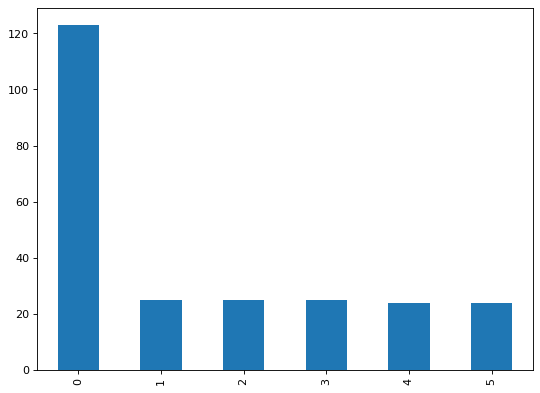

In [36]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
final_df['class'].value_counts().plot(kind='bar')


## Violence Data

In [37]:
import cv2
violence_frame_list = []
violence_label = []

for index,row in violence_df.iterrows():
    Video_File_Path = row['AVI']
    
    Video_Caption = cv2.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)
    
    while Video_Caption.isOpened():
        
        Current_Frame_ID = Video_Caption.get(1)
        
        ret,frame = Video_Caption.read()
        
        if ret != True:
            break
            
        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv2.resize(frame,(64,64))
            violence_frame_list.append(Frame_Resize)
            violence_label.append(row['class'])
            
            
    Video_Caption.release()

In [38]:
print(len(violence_frame_list))
print(len(violence_label))

556
556


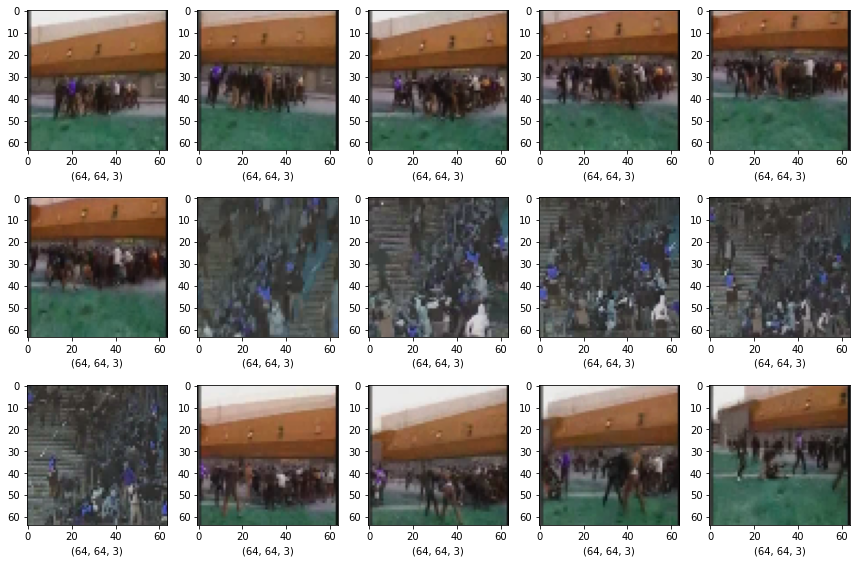

In [39]:
figure,axis = plt.subplots(3,5,figsize=(12,8))

for i,ax in enumerate(axis.flat):
    
    Img_Pick = violence_frame_list[i]
    
    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [40]:
X_4D_Violence = np.asarray(violence_frame_list)
print(np.shape(X_4D_Violence))

(556, 64, 64, 3)


In [41]:
X_4D_Violence_Labels = np.ones((556,1))
print(np.shape(X_4D_Violence_Labels))

(556, 1)


In [42]:
X_4D_Violence_Labels = X_4D_Violence_Labels.flatten()
X_4D_Violence_Labels = X_4D_Violence_Labels.astype(int)

## Non-violence Dataset

In [43]:
nonviolence_frame_list = []

for file_video in nonviolence_df.AVI:
    Video_File_Path = file_video
    
    Video_Caption = cv2.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)
    
    while Video_Caption.isOpened():
        
        Current_Frame_ID = Video_Caption.get(1)
        
        ret,frame = Video_Caption.read()
        
        if ret != True:
            break
            
        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv2.resize(frame,(64,64))
            nonviolence_frame_list.append(Frame_Resize)
            
            
    Video_Caption.release()

In [44]:
len(nonviolence_frame_list)

410

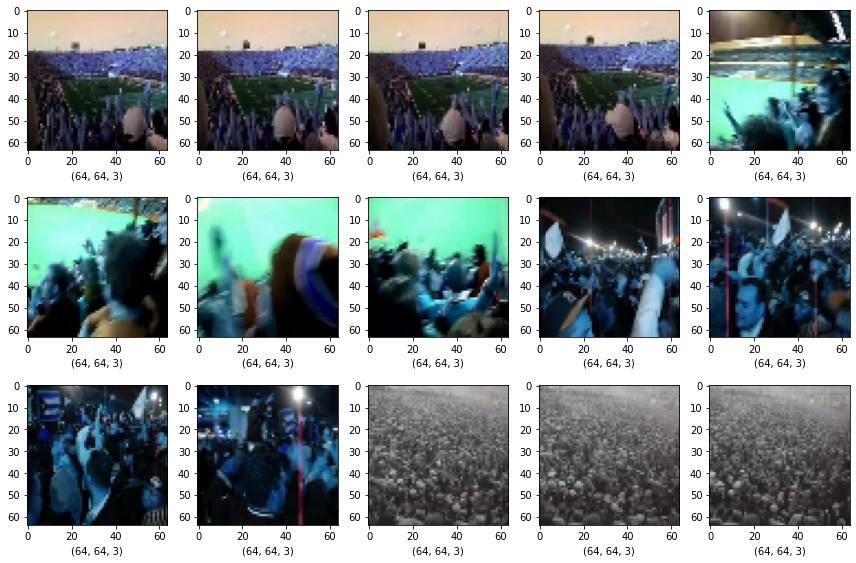

In [45]:
figure,axis = plt.subplots(3,5,figsize=(12,8))

for i,ax in enumerate(axis.flat):
    
    Img_Pick = nonviolence_frame_list[i]
    
    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [46]:
X_4D_NonViolence = np.asarray(nonviolence_frame_list)
print(np.shape(X_4D_NonViolence))

(410, 64, 64, 3)


In [47]:
X_4D_NonViolence_Labels = np.zeros((410,1))
print(np.shape(X_4D_NonViolence_Labels))

(410, 1)


In [48]:
X_4D_NonViolence_Labels = X_4D_NonViolence_Labels.flatten()
X_4D_NonViolence_Labels = X_4D_NonViolence_Labels.astype(int)
print(np.shape(X_4D_NonViolence_Labels))

(410,)


## Concatenating Violence and Non-Violence

In [49]:
X_Train = np.concatenate((X_4D_Violence,X_4D_NonViolence),axis=0)
print(np.shape(X_Train))

(966, 64, 64, 3)


In [50]:
Y_Train = np.concatenate((X_4D_Violence_Labels,X_4D_NonViolence_Labels),axis=0)
print(Y_Train.shape)

(966,)


In [51]:
Target_X = X_Train
Label_X = Y_Train
print(len(Target_X))
print(len(Label_X))

966
966


In [52]:
print(Y_Train) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

## Splitting in Training and Testing

In [53]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(X_Train,Y_Train,train_size=0.85,random_state=42,shuffle=True)

In [54]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(821, 64, 64, 3)
(821,)
(145, 64, 64, 3)
(145,)


In [55]:
import keras
from keras.models import Sequential
from keras.layers import Input, SeparableConv2D, Conv2D, MaxPooling2D, Activation
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
Model = Sequential()

# Layer 1
Model.add(SeparableConv2D(64,(3,3),activation="relu",input_shape=(64,64,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

# Layer 2
Model.add(SeparableConv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))


# Layer 3
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(128,return_sequences=True,dropout=0.5)))
Model.add(Bidirectional(LSTM(64,return_sequences=True,dropout=0.2)))

# Layer 4
Model.add(Flatten())
Model.add(Dense(200,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="tanh"))

2021-12-25 10:54:15.251427: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-25 10:54:15.343116: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-25 10:54:15.343850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-25 10:54:15.344995: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [56]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 62, 62, 64)        283       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 31, 31, 64)        4736      
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
time_distributed (TimeDistri (None, 15, 960)           0

In [57]:
import tensorflow as tf
Callback_Stop_Early = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3)
Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [58]:
CNN_Model = Model.fit(xTrain,yTrain, validation_data=(xTest,yTest),callbacks=Callback_Stop_Early,batch_size=8,epochs=20)

2021-12-25 10:54:19.149086: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2021-12-25 10:54:25.362767: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


103/103 [==============================] - 15s 27ms/step - loss: 1.8012 - accuracy: 0.6322 - val_loss: 0.6110 - val_accuracy: 0.5793
Epoch 2/20
103/103 [==============================] - 1s 14ms/step - loss: 5.7641 - accuracy: 0.4896 - val_loss: 8.2976 - val_accuracy: 0.4621
Epoch 3/20
103/103 [==============================] - 2s 17ms/step - loss: 4.0973 - accuracy: 0.5164 - val_loss: 0.5561 - val_accuracy: 0.7241
Epoch 4/20
103/103 [==============================] - 2s 15ms/step - loss: 0.6042 - accuracy: 0.7028 - val_loss: 0.4057 - val_accuracy: 0.8483
Epoch 5/20
103/103 [==============================] - 1s 14ms/step - loss: 0.4925 - accuracy: 0.7856 - val_loss: 0.3706 - val_accuracy: 0.9034
Epoch 6/20
103/103 [==============================] - 1s 14ms/step - loss: 0.5469 - accuracy: 0.7978 - val_loss: 0.3728 - val_accuracy: 0.8207
Epoch 7/20
103/103 [==============================] - 2s 15ms/step - loss: 0.4240 - accuracy: 0.8283 - val_loss: 0.3095 - val_accuracy: 0.9172
Epoch 8/2

## Prediction

In [59]:
scores = Model.evaluate(xTest, yTest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 93.79%


In [60]:
Model.save("my_model.h5")

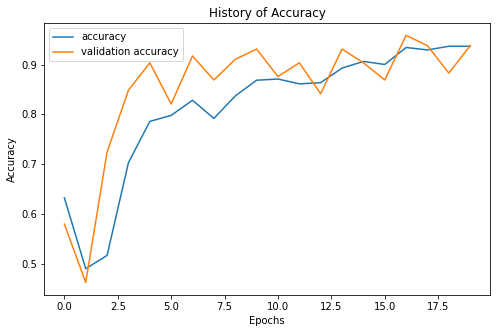

In [61]:
fig, (ax1) = plt.subplots(figsize= (8,5))
plt.plot(CNN_Model.history['accuracy'])
plt.plot(CNN_Model.history['val_accuracy'])
ax1.set_title('History of Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(['accuracy', 'validation accuracy'])

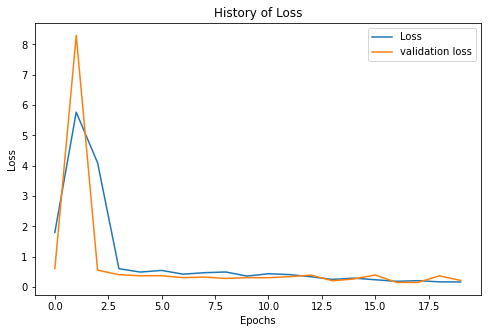

In [62]:
fig, (ax1) = plt.subplots(figsize= (8,5))
plt.plot(CNN_Model.history['loss'])
plt.plot(CNN_Model.history['val_loss'])
ax1.set_title('History of Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(['Loss', 'validation loss'])

## Test Video prediction

In [63]:
testing_video = []

Video_File_Path = '../input/violencedetectiondataset/2/Violence/fans_violence__FootBall_Fans_Violence__xxxXLsDXxxx__EaCpQJLdxJ8.avi'
    
Video_Caption = cv2.VideoCapture(Video_File_Path)
Frame_Rate = Video_Caption.get(5)
    
while Video_Caption.isOpened():
        
    Current_Frame_ID = Video_Caption.get(1)
        
    ret,frame = Video_Caption.read()
        
    if ret != True:
        break
            
    if Current_Frame_ID % math.floor(Frame_Rate) == 0:
        Frame_Resize = cv2.resize(frame,(64,64))
        testing_video.append(Frame_Resize)
            
            
Video_Caption.release()

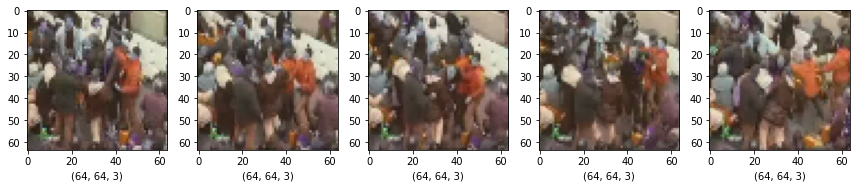

In [64]:
figure,axis = plt.subplots(1,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    
    Img_Pick = testing_video[i]
    
    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [65]:
test = np.asarray(testing_video)

In [66]:
Model_Test_Prediction = Model.predict(test)
print(np.argmax(Model_Test_Prediction))


3
